In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('C:\\Users\\thebl\\Documents\\Lomba\\SatDat2024\\FullSenyum-SatriaData2024\\DataSet\\more_preprocess.csv')
df

,Unnamed: 0,text,label
0,0,kunjung prabowo resmi serah proyek bantu air b...,Sumber Daya Alam
1,1,anies tepuk tangan riah jadi rektor wajib mata...,Politik
2,2,emang benar sih dukung anies dukung prabowo ha...,Demografi
3,3,waktu anies sikap kritis kerja bapak prabowo a...,Politik
4,4,anies baswedan harap asn masuk tni polri pegan...,Politik
...,...,...,...
4282,4578,ngeliat debat kemaren pas prabowo kicep kira k...,Politik
4283,4579,masyarakat yakin prabowo gibran milik visi jal...,Politik
4284,4580,imo both are irrational but satu jauh lebih ir...,Ekonomi
4285,4581,look at that bapak ganjar kecimpung lgislatif ...,Pertahanan dan Keamanan


In [11]:
df = df.drop(columns=['Unnamed: 0'])

In [12]:
df['label_angka'] = df.label.map({
    'Politik' : 0,
    'Sosial Budaya'  : 1,
    'Ideologi' : 2,
    'Pertahanan dan Keamanan' : 3,
    'Ekonomi' : 4,
    'Sumber Daya Alam' : 5,
    'Demografi' : 6,
    'Geografi' : 7
})
df.head()

,text,label,label_angka
0,kunjung prabowo resmi serah proyek bantu air b...,Sumber Daya Alam,5
1,anies tepuk tangan riah jadi rektor wajib mata...,Politik,0
2,emang benar sih dukung anies dukung prabowo ha...,Demografi,6
3,waktu anies sikap kritis kerja bapak prabowo a...,Politik,0
4,anies baswedan harap asn masuk tni polri pegan...,Politik,0


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.text,
    df.label_angka,
    test_size=0.3,
    random_state=102,
    stratify=df.label_angka
)

              precision    recall  f1-score   support

           0       0.86      0.55      0.67       861
           1       0.31      0.46      0.37       119
           2       0.24      0.47      0.31        78
           3       0.39      0.66      0.49        80
           4       0.39      0.73      0.51        82
           5       0.25      0.42      0.32        43
           6       0.18      0.33      0.23        18
           7       0.11      0.17      0.13         6

    accuracy                           0.54      1287
   macro avg       0.34      0.47      0.38      1287
weighted avg       0.68      0.54      0.58      1287

Balanced Accuracy: 0.47
Confusion Matrix:
 [[471  97 101  72  66  37  12   5]
 [ 28  55   7   6  10   4   7   2]
 [ 18   6  37   2   9   1   4   1]
 [ 11   9   3  53   0   4   0   0]
 [  7   2   4   1  60   5   3   0]
 [  6   4   2   3   8  18   2   0]
 [  7   3   2   0   0   0   6   0]
 [  1   1   1   0   0   2   0   1]]


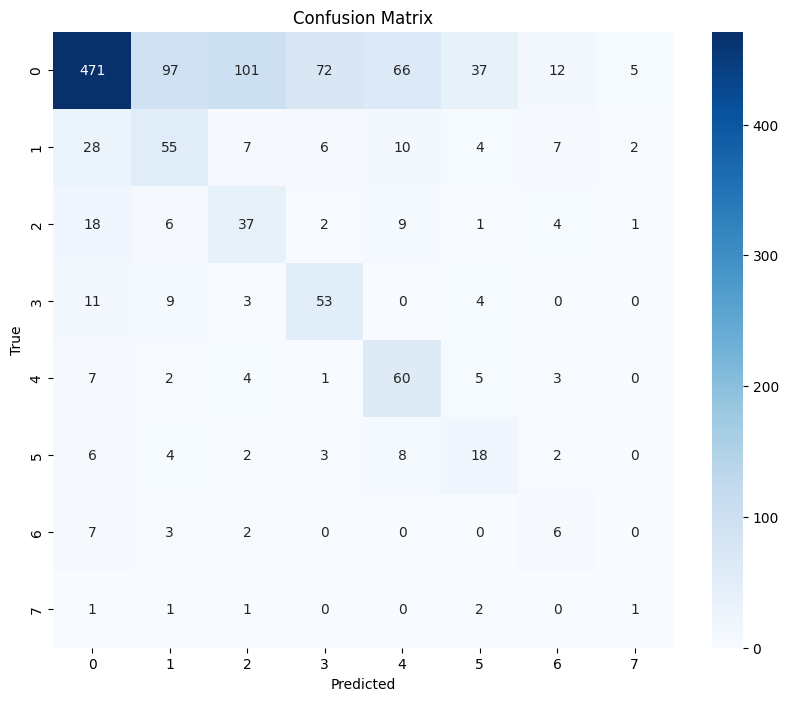

In [18]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan pipeline dengan ADASYN
clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('adasyn', ADASYN(random_state=102)),
    ('Compe NB', MultinomialNB())
])

# Fit model
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi hasil
print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Balanced Accuracy Scores: [0.43002738 0.49872862 0.48048253 0.42499291 0.46804275]
Mean Balanced Accuracy: 0.46 +/- 0.03
              precision    recall  f1-score   support

           0       0.90      0.36      0.52       861
           1       0.30      0.46      0.37       119
           2       0.22      0.45      0.30        78
           3       0.32      0.75      0.45        80
           4       0.37      0.71      0.49        82
           5       0.24      0.47      0.31        43
           6       0.08      0.56      0.15        18
           7       0.04      0.33      0.06         6

    accuracy                           0.43      1287
   macro avg       0.31      0.51      0.33      1287
weighted avg       0.70      0.43      0.47      1287

Confusion Matrix:
 [[311  99 104 108  80  47  74  38]
 [ 16  55   7   7   7   7  15   5]
 [  7   8  35   5   5   4   9   5]
 [  3   4   2  60   1   5   5   0]
 [  4   6   6   3  58   1   2   2]
 [  3   2   2   5   5  20   2   4]

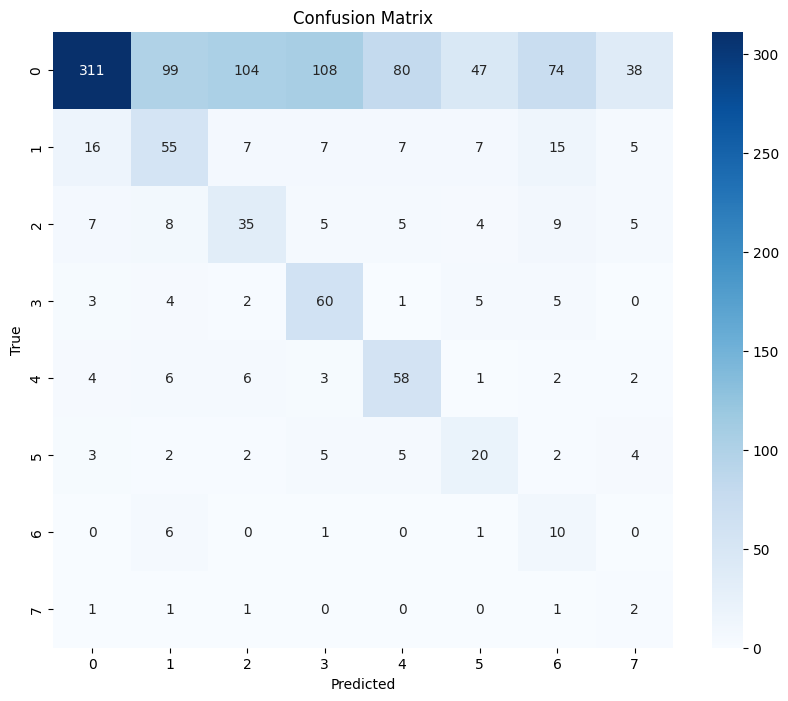

In [15]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import ComplementNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, confusion_matrix, balanced_accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan pipeline dengan ADASYN
clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('adasyn', ADASYN(random_state=102)),
    ('Compe NB', ComplementNB())
])

# Cross-validation dengan StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hitung skor balanced accuracy menggunakan cross-validation
balanced_accuracy = make_scorer(balanced_accuracy_score)
scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring=balanced_accuracy)

print(f'Balanced Accuracy Scores: {scores}')
print(f'Mean Balanced Accuracy: {scores.mean():.2f} +/- {scores.std():.2f}')

# Evaluasi menggunakan classification report dan confusion matrix
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [18]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import ComplementNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, balanced_accuracy_score, make_scorer
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan pipeline dengan ADASYN
clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('adasyn', ADASYN(random_state=102)),
    ('Compe NB', ComplementNB())
])

# Grid of parameters to search over
param_grid = {
    'vectorizer_tfid__max_features': [1000, 3000, 5000],      # Jumlah fitur maksimal
    'vectorizer_tfid__ngram_range': [(1, 1), (1, 2), (1, 3)],  # Rentang n-gram
    'vectorizer_tfid__use_idf': [True, False],                 # Gunakan IDF atau tidak
    'vectorizer_tfid__smooth_idf': [True, False],              # Smoothing pada IDF
    'Compe NB__alpha': [0.1, 0.5, 1.0, 1.5]                    # Parameter alpha untuk Complement NB
}

# Definisi balanced accuracy sebagai skor yang akan dievaluasi dalam Grid Search
balanced_accuracy = make_scorer(balanced_accuracy_score)

# Grid search cross-validation
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3, scoring=balanced_accuracy, verbose=1, n_jobs=-1)

# Fit model dengan Grid Search
grid_search.fit(X_train, y_train)

# Hasil terbaik dari Grid Search
print("Best parameters found: ", grid_search.best_params_)
print("Best balanced accuracy: {:.2f}".format(grid_search.best_score_))

# Prediksi menggunakan model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi hasil
print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy on test set: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Fitting 3 folds for each of 144 candidates, totalling 432 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Inisialisasi model Complement Naive Bayes
nb_classifier = ComplementNB()

# Definisi pipeline dengan TfidfVectorizer, SMOTE, dan Complement Naive Bayes
pipeline_nb = ImbPipeline([
    ('tfidf', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),  # SMOTE is directly included here
    ('nb', nb_classifier)
])

# Parameter grid untuk Grid Search
param_grid_nb = {
    'tfidf__max_features': [1000, 2000, 3000, None],  # Jumlah fitur maksimal dari TF-IDF
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],  # Rentang n-gram untuk TF-IDF
    'nb__alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Alpha parameter untuk Complement Naive Bayes
    'smote__sampling_strategy': ['auto', 'minority', 'not minority', 'all', {1: 1000, 0: 500}],  # Parameter SMOTE
    'smote__k_neighbors': [3, 5, 7, 10]  # Parameter SMOTE
}

# Inisialisasi Grid Search dengan cross-validation
grid_search_nb = GridSearchCV(estimator=pipeline_nb, param_grid=param_grid_nb, cv=5, scoring='balanced_accuracy')

# Melakukan fitting Grid Search pada data
grid_search_nb.fit(X_train, y_train)  # Ganti X_train dengan data teks Anda dan y_train dengan labelnya

# Mendapatkan model terbaik setelah Grid Search
best_model_nb = grid_search_nb.best_estimator_

# Prediksi menggunakan model terbaik
y_pred = best_model_nb.predict(X_test)  # Ganti X_test dengan data teks uji Anda

# Evaluasi hasil setelah tuning
print("Tuned Complement Naive Bayes Classifier with SMOTE:")
print(classification_report(y_test, y_pred))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy_score(y_test, y_pred)))

# Plot confusion matrix
conf_matrix_nb_tuned = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_nb_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Tuned Complement Naive Bayes with SMOTE')
plt.show()

# Print best parameters found by Grid Search
print("Best Parameters:", grid_search_nb.best_params_)

# Menampilkan cv_results_ dalam bentuk DataFrame
cv_results_df = pd.DataFrame(grid_search_nb.cv_results_)
cv_results_df.to_csv('grid_search_results_with_smote.csv', index=False)
print("Grid Search CV results with SMOTE saved to 'grid_search_results_with_smote.csv'")


KeyboardInterrupt: 

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan pipeline dengan ADASYN
clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('adasyn', ADASYN(random_state=102)),
    ('Multi NB', MultinomialNB())
])

# Fit model
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi hasil
print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

# Konversi teks menjadi vektor TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(X_text)

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Inisialisasi ADASYN
adasyn = ADASYN(random_state=42)

# Resample dataset menggunakan ADASYN
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Inisialisasi model CNB
cnb = ComplementNB()

# Latih model pada data yang telah di-resample
cnb.fit(X_resampled, y_resampled)

# Prediksi kelas pada data uji
y_pred = cnb.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Laporan klasifikasi
print(classification_report(y_test, y_pred))

NameError: name 'X_text' is not defined